In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
az.style.use("arviz-darkgrid")

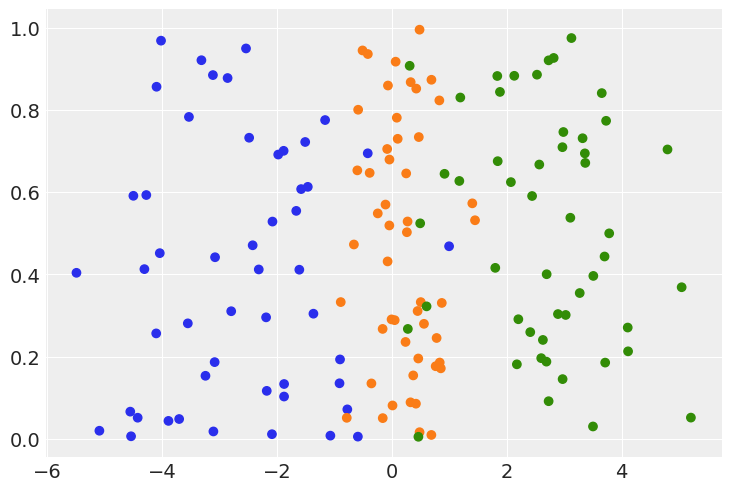

In [3]:
rng = np.random.default_rng(1234)
x = np.hstack([rng.normal(m, s, size=50) for m, s in zip([-2.5, 0, 2.5], [1.2, 0.5, 1.2])])
y = np.array(["A"] * 50 + ["B"] * 50 + ["C"] * 50)

colors = ["C0"] * 50 + ["C1"] * 50 + ["C2"] * 50
plt.scatter(x, np.random.uniform(size=150), color=colors)
plt.savefig("plot.png", dpi=300)

In [4]:
data = pd.DataFrame({"y": y, "x": x})
model = bmb.Model("y ~ x", data, family="categorical")
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


In [5]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept[B],1.697,0.397,0.975,2.478,0.014,0.010,844.0,1032.0,1.01
Intercept[C],-0.718,0.614,-1.919,0.373,0.021,0.015,871.0,934.0,1.01
x[B],1.949,0.339,1.339,2.608,0.012,0.008,818.0,1125.0,1.01
x[C],4.035,0.489,3.164,5.000,0.017,0.012,840.0,920.0,1.01


In [6]:
x_new = np.linspace(-5, 5, num=200)
model.predict(idata, data=pd.DataFrame({"x": x_new}))
p = idata.posterior["y_mean"].values.reshape((2000, 3, 200))

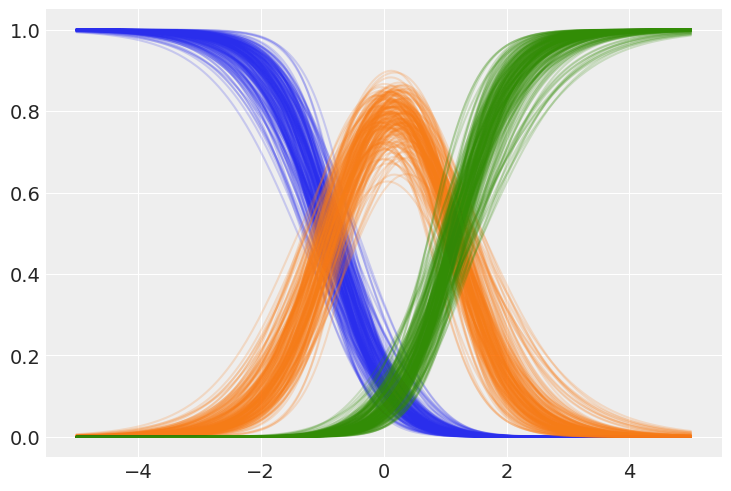

In [7]:
for j in range(3):
    plt.plot(x_new, p[::10, j, :].T, color=f"C{j}", alpha=0.2)

plt.savefig("plot2.png", dpi=300)

In [8]:
incomes = [3, 10, 20, 35]
responses = {
    "Dissatisfied": [2, 2, 0, 0], 
    "Little satisfied": [4, 6, 1, 3],
    "Moderate satisfied": [13, 22, 15, 13],
    "Very satisfied": [3, 4, 8, 8]
}

In [9]:
income = []
response = []
for r, c in responses.items():
    for i, count in enumerate(c):
        income += [incomes[i]] * count
        response += [r] * count
        
data = pd.DataFrame({"income": income, "response": response})

In [10]:
priors = {"Intercept": bmb.Prior("Normal", mu=0, sigma=2), "income": bmb.Prior("Normal", mu=0, sigma=0.2)}
model = bmb.Model("response ~ income", data, family="categorical", priors=priors)
model

Formula: response ~ income
Family name: Categorical
Link: softmax
Observations: 104
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0, sigma: 2)
    income ~ Normal(mu: 0, sigma: 0.2)


In [11]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [income, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


In [12]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept[Little satisfied],0.425,0.811,-1.139,1.859,0.027,0.020,888.0,866.0,1.00
Intercept[Moderate satisfied],1.686,0.709,0.374,2.999,0.025,0.019,804.0,856.0,1.00
Intercept[Very satisfied],-0.065,0.804,-1.444,1.552,0.027,0.019,893.0,989.0,1.00
income[Little satisfied],0.051,0.054,-0.046,0.149,0.002,0.002,577.0,782.0,1.00
income[Moderate satisfied],0.071,0.049,-0.018,0.160,0.002,0.001,534.0,757.0,1.00
income[Very satisfied],0.110,0.051,0.010,0.197,0.002,0.002,573.0,837.0,1.01


In [13]:
new_income = np.linspace(0, 60)
new_data = pd.DataFrame({"income": new_income})
model.predict(idata, data=new_data)
p = idata.posterior["response_mean"].values.reshape((2000, 4, 50))

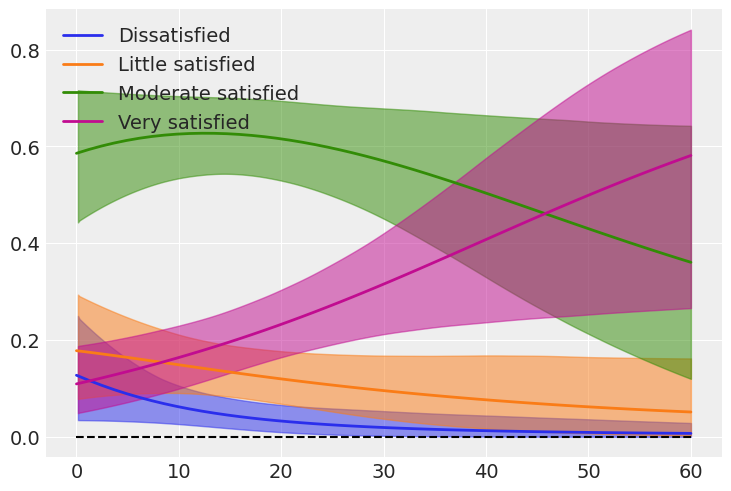

In [14]:
for j, label in enumerate(responses):
    plt.plot(new_income, p[:, j, :].T.mean(1), color=f"C{j}", lw=2, label=label)
    az.plot_hdi(new_income, hdi_data=np.quantile(p[:, j, :], [0.05, 0.94], axis=0).T, color=f"C{j}")

plt.hlines(y=0, xmin=0, xmax=60, color="black", ls="--")
plt.legend(loc=2)
plt.savefig("plot3.png", dpi=300)

In [59]:
length = [
    1.3, 1.32, 1.32, 1.4, 1.42, 1.42, 1.47, 1.47, 1.5, 1.52, 1.63, 1.65, 1.65, 1.65, 1.65,
    1.68, 1.7, 1.73, 1.78, 1.78, 1.8, 1.85, 1.93, 1.93, 1.98, 2.03, 2.03, 2.31, 2.36, 2.46,
    3.25, 3.28, 3.33, 3.56, 3.58, 3.66, 3.68, 3.71, 3.89, 1.24, 1.3, 1.45, 1.45, 1.55, 1.6, 
    1.6, 1.65, 1.78, 1.78, 1.8, 1.88, 2.16, 2.26, 2.31, 2.36, 2.39, 2.41, 2.44, 2.56, 2.67, 
    2.72, 2.79, 2.84
]

choice = [
    "I", "F", "F", "F", "I", "F", "I", "F", "I", "I", "I", "O", "O", "I", "F", "F", 
    "I", "O", "F", "O", "F", "F", "I", "F", "I", "F", "F", "F", "F", "F", "O", "O", 
    "F", "F", "F", "F", "O", "F", "F", "I", "I", "I", "O", "I", "I", "I", "F", "I", 
    "O", "I", "I", "F", "F", "F", "F", "F", "F", "F", "O", "F", "I", "F", "F"
]

sex = ["Male"] * 32 + ["Female"] * 31
data = pd.DataFrame({"choice": choice, "length": length, "sex": sex})

data["choice"]  = pd.Categorical(
    data["choice"].map({"I": "Invertebrates", "F": "Fish", "O": "Other"}), 
    ["Other", "Invertebrates", "Fish"], 
    ordered=True
)

In [60]:
model = bmb.Model("choice ~ length + sex", data, family="categorical")
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sex, length, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


In [18]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept[Invertebrates],7.509,2.260,2.983,11.430,0.074,0.052,963.0,1225.0,1.0
Intercept[Fish],1.611,1.770,-1.713,4.876,0.063,0.046,809.0,940.0,1.0
length[Invertebrates],-3.079,1.008,-5.020,-1.276,0.029,0.020,1265.0,1249.0,1.0
length[Fish],-0.019,0.609,-1.220,1.039,0.019,0.014,1007.0,1218.0,1.0
"sex[Invertebrates, Male]",-1.652,1.022,-3.480,0.341,0.033,0.024,974.0,876.0,1.0
"sex[Fish, Male]",-0.501,0.904,-2.198,1.160,0.030,0.023,907.0,956.0,1.0


In [19]:
new_length = np.linspace(1, 4)
new_data = pd.DataFrame({"length": np.tile(new_length, 2), "sex": ["Male"] * 50 + ["Female"] * 50})
model.predict(idata, data=new_data)
p = idata.posterior["choice_mean"].values.reshape((2000, 3, 100))

In [20]:
from matplotlib.lines import Line2D

/tmp/ipykernel_15442/2576227305.py:16: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.05, right=0.975, bottom=0.075, top=0.85)


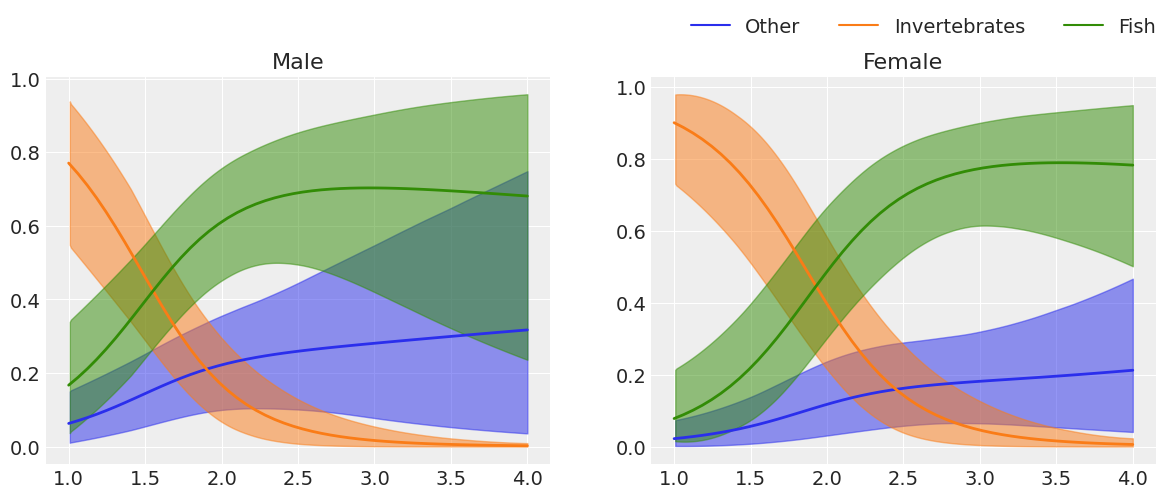

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

choices = ["Other", "Invertebrates", "Fish"]
for j, label in enumerate(choices):
    axes[0].plot(new_length, p[:, j, :50].T.mean(1), color=f"C{j}", lw=2)
    axes[1].plot(new_length, p[:, j, 50:].T.mean(1), color=f"C{j}", lw=2)
    
    az.plot_hdi(new_length, hdi_data=np.quantile(p[:, j, :50], [0.05, 0.94], axis=0).T, color=f"C{j}", ax=axes[0])
    az.plot_hdi(new_length, hdi_data=np.quantile(p[:, j, 50:], [0.05, 0.94], axis=0).T, color=f"C{j}", ax=axes[1])

axes[0].set_title("Male")
axes[1].set_title("Female")

handles = [Line2D([], [], color=f"C{j}", label=choice) for j, choice in  enumerate(choices)]

fig.subplots_adjust(left=0.05, right=0.975, bottom=0.075, top=0.85)

fig.legend(
    handles, 
    choices,
    loc="center right",
    ncol=3,
    bbox_to_anchor=(0.99, 0.95),
    bbox_transform=fig.transFigure
)
plt.savefig("plot4.png", dpi=300)

**TODO:** Group specific effects!!!

In [61]:
data = pd.read_csv("inhaler.csv")
data["rating"] = pd.Categorical(data["rating"], categories=[1, 2, 3, 4])

In [62]:
model = bmb.Model("rating ~ period + carry + treat + (1|subject)", data, family="categorical")
idata = model.fit(chains=2, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [1|subject_offset, 1|subject_sigma, treat, carry, period, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 15 seconds.
The number of effective samples is smaller than 25% for some parameters.


24.6 seconds compilation plus sampling.

In [48]:
#az.summary(idata, var_names=["Intercept", "period", "carry", "treat"])

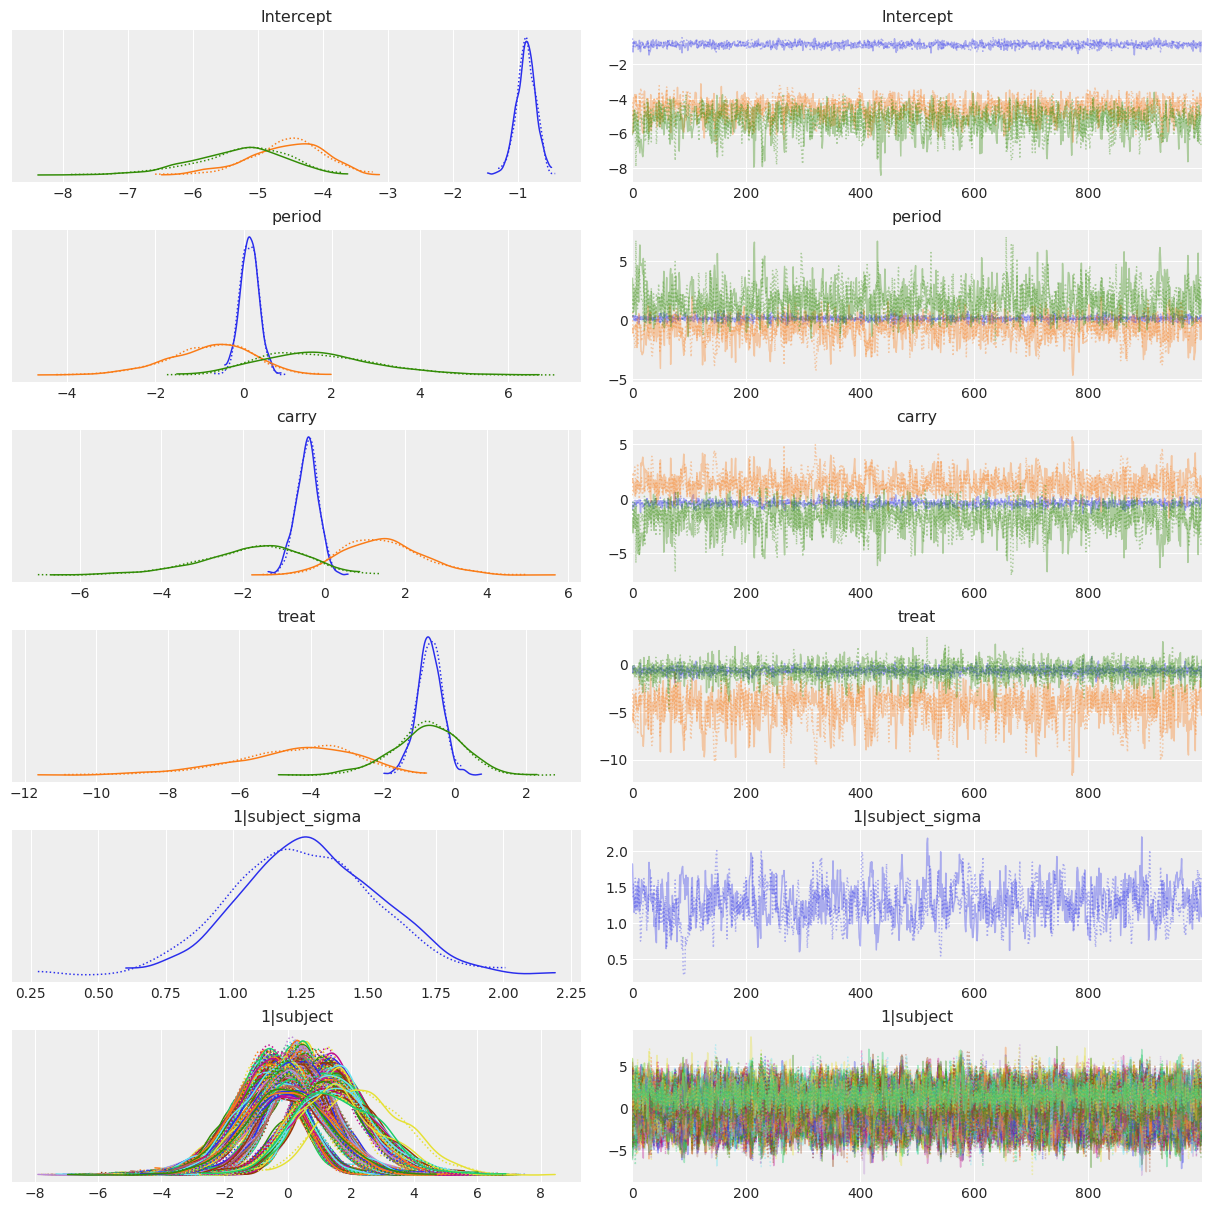

In [63]:
az.plot_trace(idata)
fig = plt.gcf()
fig.savefig("plot5.png", dpi=300)

1|subject: (2, 1000, 3, 286)
New shape: (2000, 286, 3)


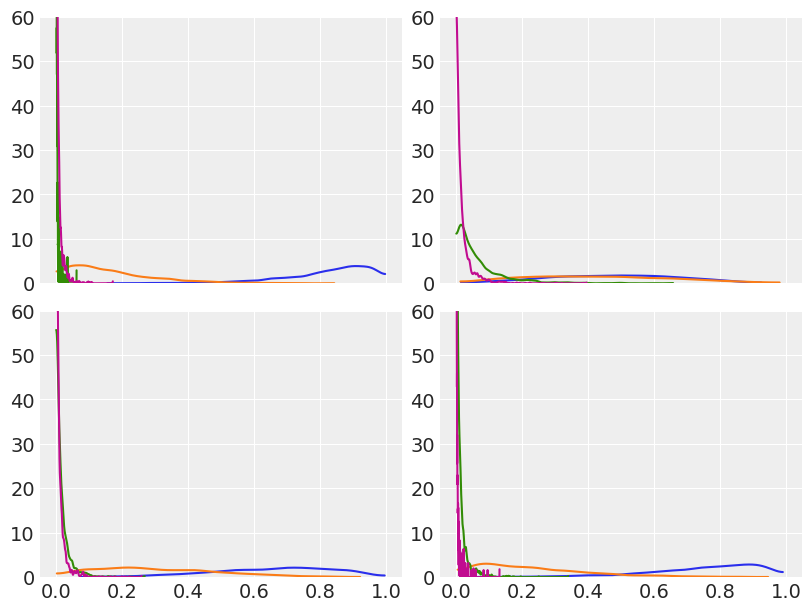

In [66]:
d = data.drop_duplicates(["carry", "treat", "period"])
model.predict(idata, data=d)
p = idata.posterior.rating_mean.values.reshape((2000, 4, 4))

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)

for subject_idx in range(4):
    ax = axes.ravel()[subject_idx]
    for rating in range(4):
        x = p[:, rating, subject_idx]
        az.plot_kde(x, plot_kwargs={"color": f"C{rating}"}, ax=ax)
        ax.set_ylim(0, 60)

fig.savefig("plot6.png", dpi=300)

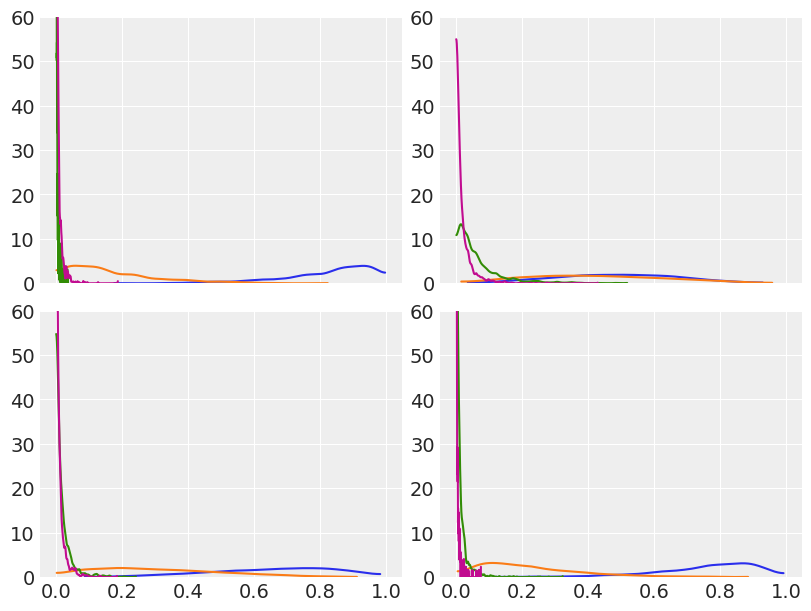